# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [131]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from skmisc import loess

In [3]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
# Linear Regression
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"])]
)

my_pipeline = Pipeline(
    [("dummify_everything", ct), ("ols", lr)]
)

In [22]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_testlm = X_test
X_testlm["pred"] = y_pred

print(f"R^2: {r2}")
fitted_pipeline["ols"].coef_

R^2: 0.8663343287231036


array([ 0.29629489, -3.51223377, -0.36740346, -0.10117809,  1.44623945])

In [7]:
# Quadratic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"]),
    ("Square", PolynomialFeatures(degree = (1, 2)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("dummify_everything and square", ct), ("ols", lr)]
)

In [8]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_testsq = X_test
X_testsq["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.8068758589442951


In [9]:
# Cubic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"]),
    ("Cube", PolynomialFeatures(degree = (1, 3)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("dummify_everything and cube", ct), ("ols", lr)]
)

In [10]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_testcr = X_test
X_testcr["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.8463657138296916


In [11]:
# 10 Factor Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"]),
    ("Cube", PolynomialFeatures(degree = (1, 10)), ["bill_length_mm"])]
)

my_pipeline = Pipeline(
    [("dummify_everything and 10-factor", ct), ("ols", lr)]
)

In [12]:
fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_pred = fitted_pipeline.predict(X_test)

r2 = r2_score(y_true = y_test, y_pred = y_pred)

X_test10r = X_test
X_test10r["pred"] = y_pred

print(f"R^2: {r2}")

R^2: 0.291532837552107


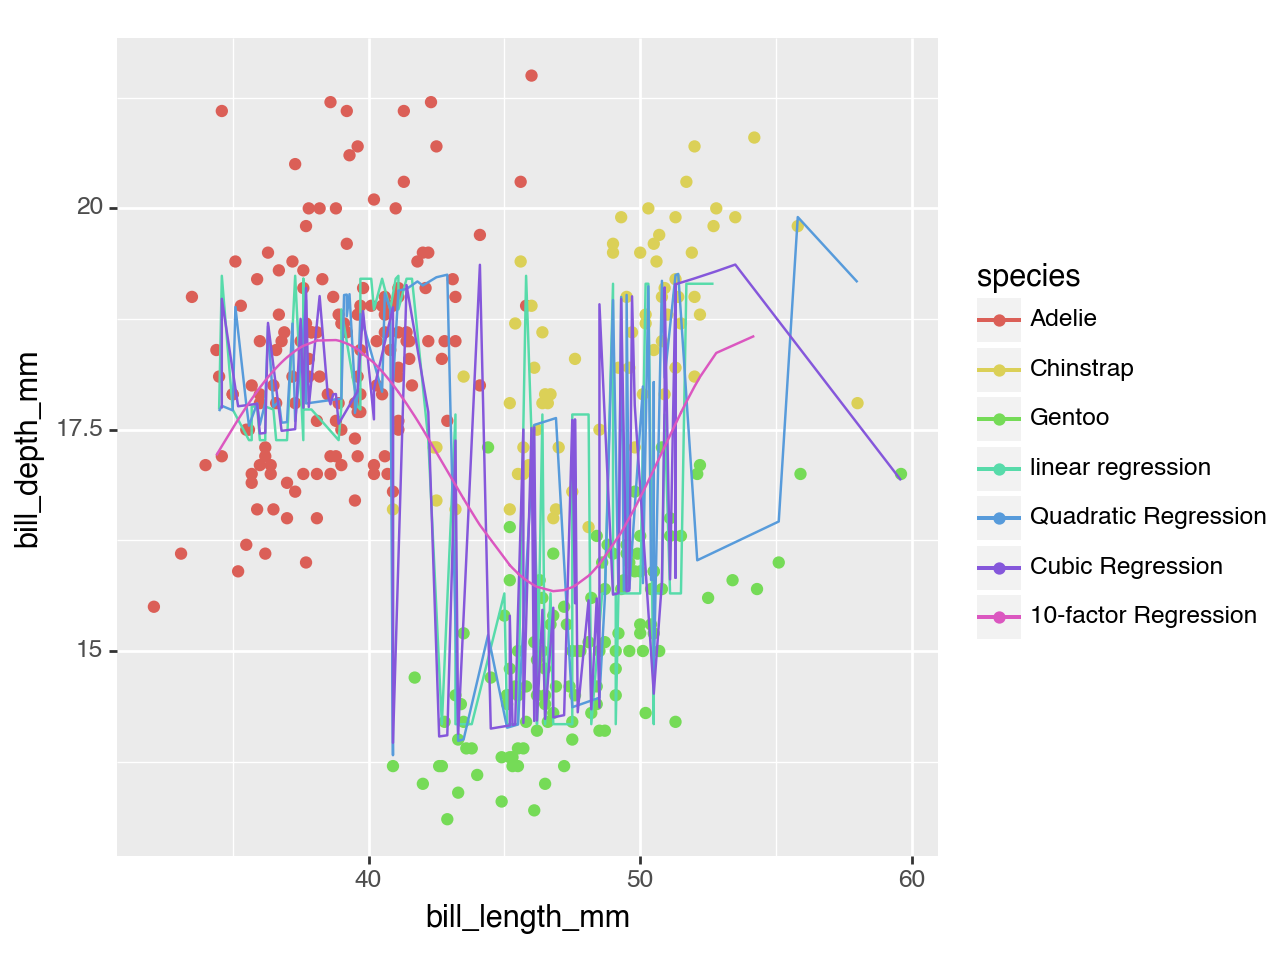

<Figure Size: (640 x 480)>

In [17]:
from plotnine import ggplot, aes, geom_point, geom_line, labs
(ggplot(penguins, aes(x = "bill_length_mm", y = "bill_depth_mm", color = "species")) + 
    geom_point() +
    geom_line(X_testlm, aes(x = "bill_length_mm", y = "pred", color = '"linear regression"'), inherit_aes = False) +
    geom_line(X_testsq, aes(x = "bill_length_mm", y = "pred", color = '"Quadratic Regression"'), inherit_aes = False) +
    geom_line(X_testcr, aes(x = "bill_length_mm", y = "pred", color = '"Cubic Regression"'), inherit_aes = False) + 
    geom_line(X_test10r, aes(x = "bill_length_mm", y = "pred", color = '"10-factor Regression"'), inherit_aes = False))

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [121]:
# Model 1
# Keeping Everything
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_1", enc, ["species"]),
    ("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"])]
)

my_pipeline = Pipeline(
    [("dummify_everything", ct), ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_predtest = fitted_pipeline.predict(X_test)
y_predtrain = fitted_pipeline.predict(X_train)

mse_testm1 = mean_squared_error(y_true = y_test, y_pred = y_predtest)
mse_trainm1 = mean_squared_error(y_true = y_train, y_pred = y_predtrain)

flex = [12, 12]
mse_list = [mse_testm1, mse_trainm1]

In [122]:
# Model 2
# Dropping Species
X = penguins.drop(["bill_depth_mm", "species"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_2", enc, ["island"]),
    ("dummify_3", enc, ["sex"])]
)

my_pipeline = Pipeline(
    [("dummify_everything", ct), ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_predtest = fitted_pipeline.predict(X_test)
y_predtrain = fitted_pipeline.predict(X_train)

mse_testm2 = mean_squared_error(y_true = y_test, y_pred = y_predtest)
mse_trainm2 = mean_squared_error(y_true = y_train, y_pred = y_predtrain)

flex.append(9)
flex.append(9)
mse_list.append(mse_testm2)
mse_list.append(mse_trainm2)

In [123]:
# Model 3
# Dropping Species and Island
X = penguins.drop(["bill_depth_mm", "species", "island"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()
enc = OneHotEncoder(drop = "first")

ct = ColumnTransformer(
    [("dummify_3", enc, ["sex"])]
)

my_pipeline = Pipeline(
    [("dummify_everything", ct), ("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_predtest = fitted_pipeline.predict(X_test)
y_predtrain = fitted_pipeline.predict(X_train)

mse_testm3 = mean_squared_error(y_true = y_test, y_pred = y_predtest)
mse_trainm3 = mean_squared_error(y_true = y_train, y_pred = y_predtrain)

flex.append(6)
flex.append(6)
mse_list.append(mse_testm3)
mse_list.append(mse_trainm3)

In [124]:
# Model 4
# Dropping Species, Island, and Sex
X = penguins.drop(["bill_depth_mm", "species", "island", "sex"], axis = 1)
y = penguins["bill_depth_mm"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

lr = LinearRegression()

my_pipeline = Pipeline(
    [("ols", lr)]
)

fitted_pipeline = my_pipeline.fit(X_train, y_train)

y_predtest = fitted_pipeline.predict(X_test)
y_predtrain = fitted_pipeline.predict(X_train)

mse_testm4 = mean_squared_error(y_true = y_test, y_pred = y_predtest)
mse_trainm4 = mean_squared_error(y_true = y_train, y_pred = y_predtrain)

flex.append(4)
flex.append(4)
mse_list.append(mse_testm4)
mse_list.append(mse_trainm4)

In [125]:
mse = pd.DataFrame(columns=["Flexibility", "Mean Squared Error", "Test/Train"])
mse["Flexibility"] = flex
mse["Mean Squared Error"] = mse_list
mse["Test/Train"] = ["Test", "Train", "Test", "Train", "Test", "Train", "Test", "Train"]
mse

,Flexibility,Mean Squared Error,Test/Train
0,12,0.673770,Test
1,12,0.687854,Train
2,9,1.692674,Test
3,9,1.832675,Train
4,6,3.272309,Test
5,6,3.348648,Train
6,4,2.573056,Test
7,4,2.359000,Train


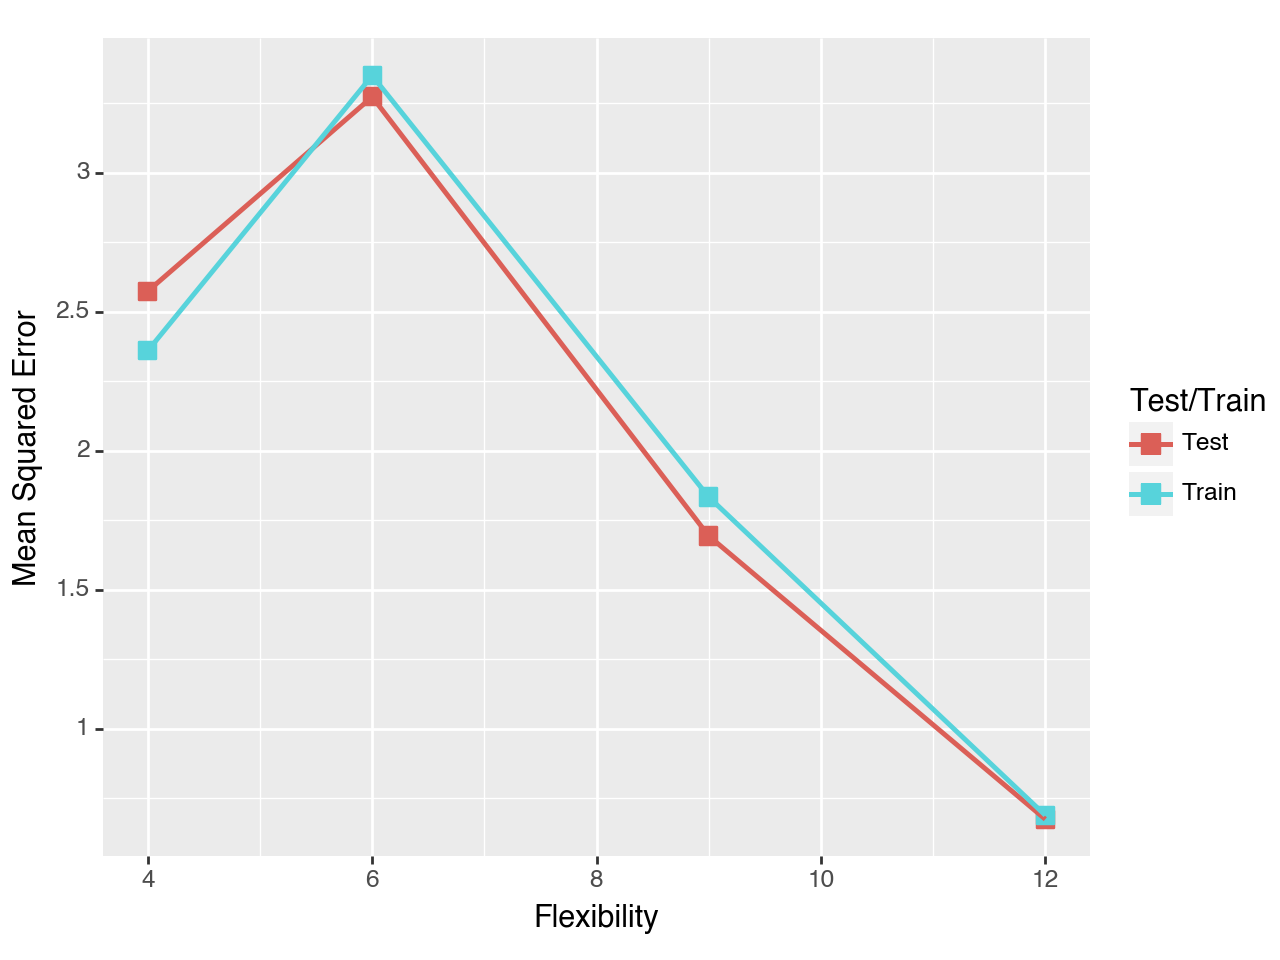

<Figure Size: (640 x 480)>

In [147]:
from plotnine import geom_smooth
(ggplot(mse, aes(x = "Flexibility", y = "Mean Squared Error", color = "Test/Train")) + 
    geom_point(shape = "s", size = 3) + 
    geom_smooth(method="lowess", se=False))